### This is a first baRNAba example. RMSD/eRMSD calculation and annotation. 

We consider a MD simulation of a UUCG tetraloop. We calculate the eRMSD as well as the RMSD from the reference, native structure. 


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# import barnaba
import barnaba as bb

# define trajectory and topology files
traj = "../test/data/UUCG.xtc"
top = "../test/data/UUCG.pdb"
native="uucg2.pdb"


print "# calculate eRMSD from native"
ermsd = bb.ermsd(native,traj,topology=top)

print "# calculate RMSD from native"
rmsd = bb.rmsd(native,traj,topology=top)

# calculate eRMSD from native


# Loaded reference uucg2.pdb 
# Loaded target ../test/data/UUCG.xtc 


# calculate RMSD from native
# found  166 atoms in common


Note that by default the alignment is made considering all heavy atoms. Where the sequence between the reference and the target structure differs, only backbone/sugar atoms are used.

We can now plot the two quantities over time:

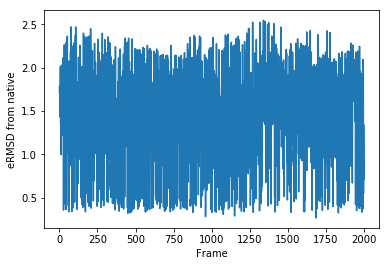

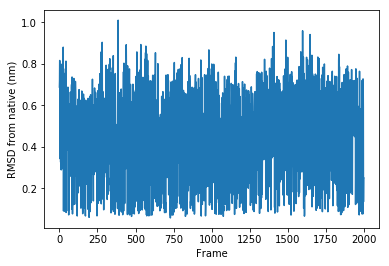

In [76]:
import matplotlib.pyplot as plt
plt.xlabel("Frame")
plt.ylabel("eRMSD from native")
plt.plot(ermsd[::10])
plt.show()

plt.xlabel("Frame")
plt.ylabel("RMSD from native (nm)")
plt.plot(rmsd[::10])
plt.show()

The RMSD is known to be a suboptimal distance for nucleic acids, mainly because it does not take explicitly into account base-pairing and base-stacking interactions. Let's see what are the differences by plotting RMSD vs eRMSD:

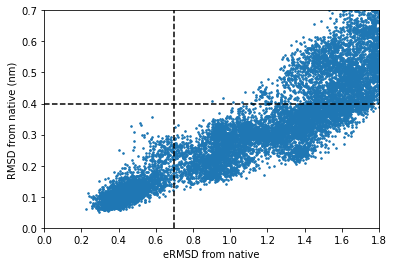

In [77]:
plt.xlabel("eRMSD from native")
plt.ylabel("RMSD from native (nm)")
plt.axhline(0.4,ls = "--", c= 'k')
plt.axvline(0.7,ls = "--", c= 'k')
plt.xlim(0,2.0)
plt.ylim(0,0.7)
plt.scatter(ermsd,rmsd,s=2.5)

Dashed lines indicate the threshold for high similarity: RMSD < 0.4nm and eRMSD < 0.7.

Structures with eRMSD lower than 0.7 are typically very similar to the native.
Note that structures with *low* RMSD (less than 0.4 nm) may be very different from native.

Let's check this!

We now pick the structure with highest RMSD among all structures with eRMSD < 0.7.

Highest RMSD for structures with  eRMSD < 0.7
0.356nm; eRMSD: 0.582


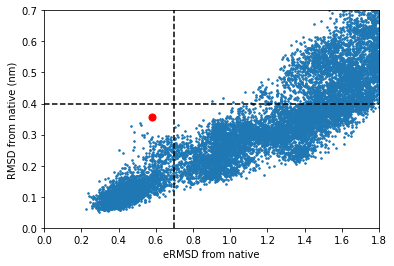

In [78]:
low_ermsd = np.where(ermsd<0.7)
idx_a = np.argsort(rmsd[low_ermsd])[-1]
low_e = low_ermsd[0][idx_a]
print "Highest RMSD for structures with  eRMSD < 0.7"
print "%5.3fnm; eRMSD: %5.3f" % (rmsd[low_e],ermsd[low_e])


plt.xlabel("eRMSD from native")
plt.ylabel("RMSD from native (nm)")
plt.axhline(0.4,ls = "--", c= 'k')
plt.axvline(0.7,ls = "--", c= 'k')
plt.xlim(0,2.0)
plt.ylim(0,0.7)
plt.scatter(ermsd,rmsd,s=2.5)

plt.scatter(ermsd[low_e],rmsd[low_e],s=50,c='r')

We can use the py3Dmol module to visualize this structure

In [79]:
import py3Dmol
import mdtraj as md

# load trajectory
tt = md.load(traj,top=top)

# save low ermsd 
tt[low_e].save("low_ermsd.pdb")

# align to native
rmsd1 = bb.rmsd(native,'low_ermsd.pdb',out='low_ermsd_align.pdb')

# show
pdb_e = open('low_ermsd_align.pdb','r').read()
pdb_n = open(native,'r').read()

p = py3Dmol.view(width=900,height=600,viewergrid=(1,2))
p.addModel(pdb_n,'pdb',viewer=(0,0))
p.addModel(pdb_e,'pdb',viewer=(0,1))

p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()



# found  166 atoms in common


On the left the native UUCG and on the right the highest RMSD among all structures with eRMSD from native < 0.7.
The two structures are very similar except for the apical nucleotide U2. We can annotate the two structures using the leontis-westhof classification to cross-check this:

In [80]:
# annotate native
stackings_native, pairings_native, res_native = bb.annotate(native)
print "NATIVE BASE-PAIR"
for p in range(len(pairings_native[0][0])):
    print res_lowe[pairings_native[0][0][p][0]],
    print res_lowe[pairings_native[0][0][p][1]],
    print pairings_native[0][1][p]
    
print ""
stackings_lowe, pairings_lowe, res_lowe = bb.annotate("low_ermsd_align.pdb")

print "LOW-ERMSD, HIGH-RMSD STRUCTURE BASE-PAIR"
for p in range(len(pairings_lowe[0][0])):
    print res_lowe[pairings_lowe[0][0][p][0]],
    print res_lowe[pairings_lowe[0][0][p][1]],
    print pairings_lowe[0][1][p]

print ""
# annotate native

print "NATIVE STACKING"
for p in range(len(stackings_native[0][0])):
    print res_lowe[stackings_native[0][0][p][0]],
    print res_lowe[stackings_native[0][0][p][1]],
    print stackings_native[0][1][p]
    
print ""


print "LOW-ERMSD, HIGH-RMSD STRUCTURE STACKING"
for p in range(len(stackings_lowe[0][0])):
    print res_lowe[stackings_lowe[0][0][p][0]],
    print res_lowe[stackings_lowe[0][0][p][1]],
    print stackings_lowe[0][1][p]

    
# compare pairing:
#print res_lowe
#print res_native
#print stackings_native
#print stackings_lowe

#print pairings_native
#print pairings_lowe


NATIVE BASE-PAIR
C_1_0 G_8_0 WCc
C_2_0 G_7_0 WCc
U_3_0 G_6_0 SWt

LOW-ERMSD, HIGH-RMSD STRUCTURE BASE-PAIR
C_1_0 G_8_0 WWc
C_2_0 G_7_0 WCc
C_2_0 G_8_0 WWc
U_3_0 G_6_0 SWt
U_3_0 G_7_0 WWc

NATIVE STACKING
C_1_0 C_2_0 >>
C_2_0 U_3_0 >>

LOW-ERMSD, HIGH-RMSD STRUCTURE STACKING
C_1_0 C_2_0 >>
C_2_0 U_3_0 >>
U_3_0 C_5_0 >>
G_6_0 G_7_0 <>
G_7_0 G_8_0 >>


# Loading uucg2.pdb 
# Loading low_ermsd_align.pdb 


We can clearly see that all stacking and base-pairs in the native structures, including the trans Sugar-Watson base pair are present in the low ermsd, high RMSD structure. 

We can now do the reverse excercise, i.e. to pick the structure with highest eRMSD among all structures with RMSD < 0.4nm

Highest eRMSD for structures with  RMSD < 0.3nm
1.894; RMSD: 0.389nm


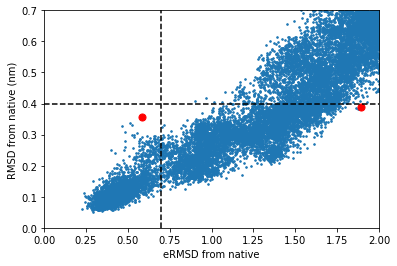

In [85]:
low_rmsd = np.where(rmsd<0.4)
idx_b = np.argsort(ermsd[low_rmsd])[-1]
low_r = low_rmsd[0][idx_b]                                          
print "Highest eRMSD for structures with  RMSD < 0.4nm"
print "%5.3f; RMSD: %5.3fnm" % (ermsd[low_r],rmsd[low_r])

plt.xlabel("eRMSD from native")
plt.ylabel("RMSD from native (nm)")
plt.axhline(0.4,ls = "--", c= 'k')
plt.axvline(0.7,ls = "--", c= 'k')
plt.xlim(0,2.0)
plt.ylim(0,0.7)
plt.scatter(ermsd,rmsd,s=2.5)

plt.scatter(ermsd[low_e],rmsd[low_e],s=50,c='r')
plt.scatter(ermsd[low_r],rmsd[low_r],s=50,c='r')

In [82]:
# save low ermsd 
tt[low_r].save("low_rmsd.pdb")

# align to native
rmsd1 = bb.rmsd(native,'low_rmsd.pdb',out='low_rmsd_align.pdb')

# show
pdb_r = open('low_rmsd_align.pdb','r').read()
pdb_n = open(native,'r').read()

p = py3Dmol.view(width=900,height=600,viewergrid=(1,2))
p.addModel(pdb_n,'pdb',viewer=(0,0))
p.addModel(pdb_r,'pdb',viewer=(0,1))

p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

# found  166 atoms in common


In [83]:
# annotate native
stackings_native, pairings_native, res_native = bb.annotate(native)
print "NATIVE BASE-PAIR"
for p in range(len(pairings_native[0][0])):
    print res_lowe[pairings_native[0][0][p][0]],
    print res_lowe[pairings_native[0][0][p][1]],
    print pairings_native[0][1][p]
    
print ""
stackings_lowr, pairings_lowr, res_lowr = bb.annotate("low_rmsd_align.pdb")

print "LOW-RMSD, HIGH-eRMSD STRUCTURE BASE-PAIR"
for p in range(len(pairings_lowr[0][0])):
    print res_lowr[pairings_lowr[0][0][p][0]],
    print res_lowr[pairings_lowr[0][0][p][1]],
    print pairings_lowr[0][1][p]

print ""

print "NATIVE STACKING"
for p in range(len(stackings_native[0][0])):
    print res_lowr[stackings_native[0][0][p][0]],
    print res_lowr[stackings_native[0][0][p][1]],
    print stackings_native[0][1][p]
    
print ""

print "LOW-RMSD, HIGH-eRMSD STRUCTURE STACKING"
for p in range(len(stackings_lowr[0][0])):
    print res_lowr[stackings_lowr[0][0][p][0]],
    print res_lowr[stackings_lowr[0][0][p][1]],
    print stackings_lowr[0][1][p]

NATIVE BASE-PAIR
C_1_0 G_8_0 WCc
C_2_0 G_7_0 WCc
U_3_0 G_6_0 SWt

LOW-RMSD, HIGH-eRMSD STRUCTURE BASE-PAIR
C_1_0 C_2_0 XXX
C_1_0 G_7_0 WWc
C_2_0 G_8_0 XXX

NATIVE STACKING
C_1_0 C_2_0 >>
C_2_0 U_3_0 >>

LOW-RMSD, HIGH-eRMSD STRUCTURE STACKING
U_3_0 C_5_0 <<
U_4_0 G_6_0 <<
C_5_0 G_7_0 <>


# Loading uucg2.pdb 
# Loading low_rmsd_align.pdb 
